# IMDB Movie Analysis
This project will analyze the IMDB movie dataset from ZTM's provided csv file.
The goals of the project are:
1. Clean and preprocess the data.
2. Determine relationship between genre and movie rating.
3. Analyze factors that contribute to box office success.
4. Predict ratings of movies via confidence intervals.
5. Write up a conclusion that will highlight key insights learned.

Importing libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [58]:
data = pd.read_csv("imdb.csv")
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [59]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [61]:
df = data[["Series_Title" ,"Director", "Genre", "IMDB_Rating", "Released_Year", "Gross", "Runtime", "Meta_score"]]
df.head()

,Series_Title,Director,Genre,IMDB_Rating,Released_Year,Gross,Runtime,Meta_score
0,The Shawshank Redemption,Frank Darabont,Drama,9.3,1994,"28,341,469",142 min,80.0
1,The Godfather,Francis Ford Coppola,"Crime, Drama",9.2,1972,"134,966,411",175 min,100.0
2,The Dark Knight,Christopher Nolan,"Action, Crime, Drama",9.0,2008,"534,858,444",152 min,84.0
3,The Godfather: Part II,Francis Ford Coppola,"Crime, Drama",9.0,1974,"57,300,000",202 min,90.0
4,12 Angry Men,Sidney Lumet,"Crime, Drama",9.0,1957,"4,360,000",96 min,96.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Director       1000 non-null   object 
 2   Genre          1000 non-null   object 
 3   IMDB_Rating    1000 non-null   float64
 4   Released_Year  1000 non-null   object 
 5   Gross          831 non-null    object 
 6   Runtime        1000 non-null   object 
 7   Meta_score     843 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [63]:
# convert Released_Year to number because it's an object/string
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors = "coerce")

C:\Users\gemst\AppData\Local\Temp\ipykernel_10636\2570722277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors = "coerce")


In [64]:
## because we have an error, we check position 966
df.iloc[966]
## changed to NaN

Series_Title                     Apollo 13
Director                        Ron Howard
Genre            Adventure, Drama, History
IMDB_Rating                            7.6
Released_Year                          NaN
Gross                          173,837,933
Runtime                            140 min
Meta_score                            77.0
Name: 966, dtype: object

In [65]:
# create a Decade column
df["Released_Decade"] = np.floor(df["Released_Year"]/10)*10

C:\Users\gemst\AppData\Local\Temp\ipykernel_10636\2368321684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Released_Decade"] = np.floor(df["Released_Year"]/10)*10


In [66]:
# Transforming the runtime column from "x min" to x as an integer
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)

C:\Users\gemst\AppData\Local\Temp\ipykernel_10636\1064021313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)


In [67]:
# Since we see some null values in the gross column from df.info(), we now fill the 
df["Gross"] = df["Gross"].fillna("0")

C:\Users\gemst\AppData\Local\Temp\ipykernel_10636\2722753034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gross"] = df["Gross"].fillna("0")


In [68]:
df["Gross"] = df["Gross"].str.replace(",", "").astype(int)
df["Gross (millions)"] = df["Gross"] / 1000000

C:\Users\gemst\AppData\Local\Temp\ipykernel_10636\1059538254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gross"] = df["Gross"].str.replace(",", "").astype(int)
C:\Users\gemst\AppData\Local\Temp\ipykernel_10636\1059538254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gross (millions)"] = df["Gross"] / 1000000


In [69]:
df.describe()

,IMDB_Rating,Released_Year,Gross,Runtime,Meta_score,Released_Decade,Gross (millions)
count,1000.000000,999.000000,1.000000e+03,1000.000000,843.000000,999.000000,1000.000000
mean,7.949300,1991.217217,5.653688e+07,122.891000,77.971530,1986.586587,56.536878
std,0.275491,23.297025,1.032382e+08,28.093671,12.376099,23.189130,103.238179
min,7.600000,1920.000000,0.000000e+00,45.000000,28.000000,1920.000000,0.000000
25%,7.700000,1976.000000,4.457098e+05,103.000000,70.000000,1970.000000,0.445710
50%,7.900000,1999.000000,1.070275e+07,119.000000,79.000000,1990.000000,10.702751
75%,8.100000,2009.000000,6.153989e+07,137.000000,87.000000,2000.000000,61.539891
max,9.300000,2020.000000,9.366622e+08,321.000000,100.000000,2020.000000,936.662225


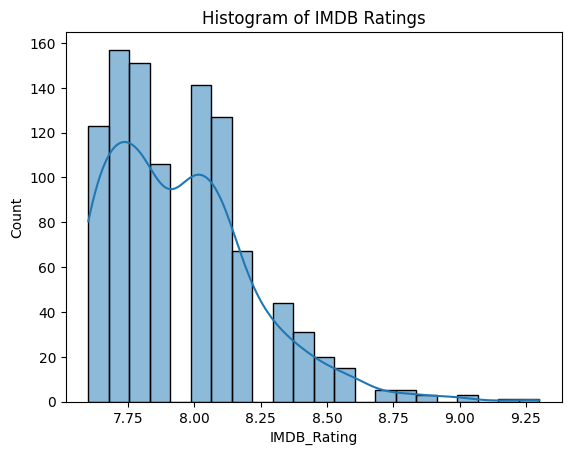

In [70]:
# Histogram of the ratings 
sns.histplot(df["IMDB_Rating"], kde=True)
plt.title("Histogram of IMDB Ratings");

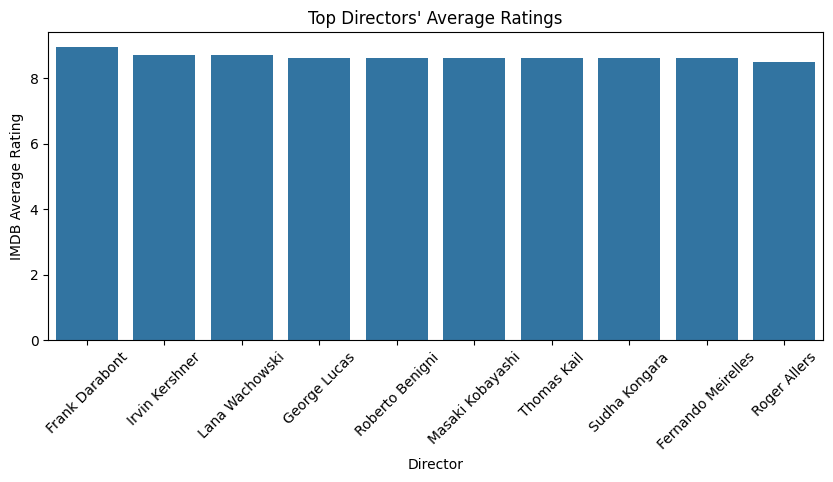

In [71]:
# Top directors' average ratings
top_director_ratings = (df.groupby(["Director"])["IMDB_Rating"]
                            .mean()
                            .sort_values(ascending = False)
                            [:10])
plt.figure(figsize=(10,4))
sns.barplot(x=top_director_ratings.index, 
            y=top_director_ratings.values)
plt.xticks(rotation = 45)
plt.title("Top Directors' Average Ratings")
plt.ylabel("IMDB Average Rating");

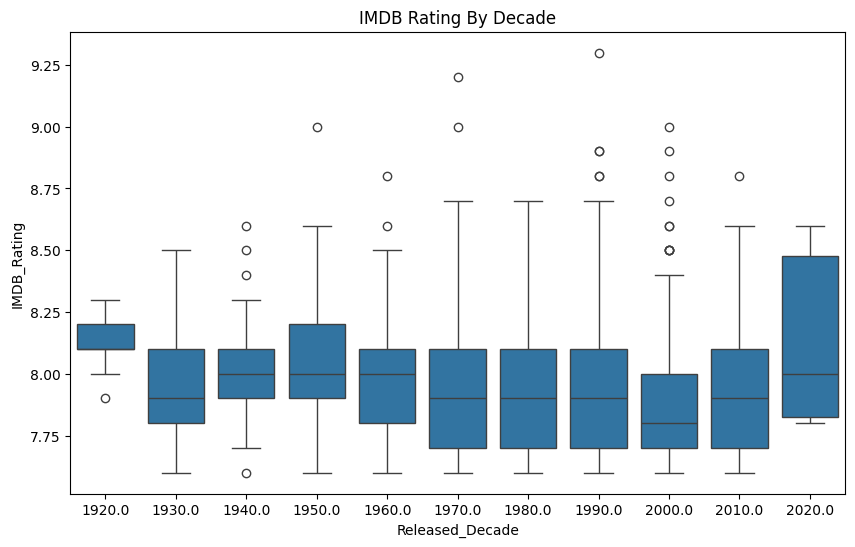

In [72]:
# distribution of rating by decade
plt.figure(figsize=(10, 6))
sns.boxplot(x = "Released_Decade",
            y = "IMDB_Rating",
            data = df)
plt.title("IMDB Rating By Decade");

In [73]:
# Covariance matrix
df_co = df[["Runtime", "IMDB_Rating", "Gross (millions)", "Meta_score"]]
df_co.cov()

,Runtime,IMDB_Rating,Gross (millions),Meta_score
Runtime,789.254373,1.881455,417.438934,-10.526302
IMDB_Rating,1.881455,0.075895,2.343023,0.942946
Gross (millions),417.438934,2.343023,10658.121703,-72.676259
Meta_score,-10.526302,0.942946,-72.676259,153.167835


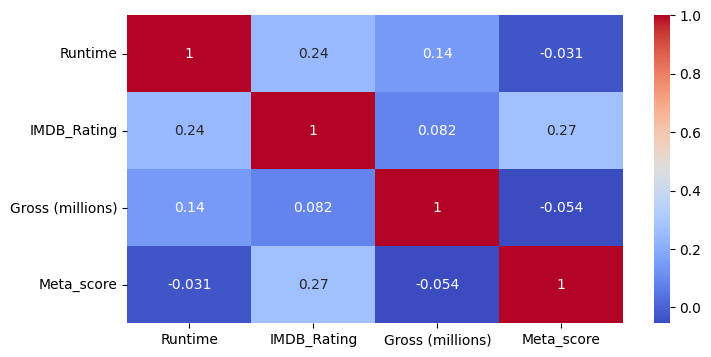

In [74]:
# Heatmap 
plt.figure(figsize=(8, 4))
sns.heatmap(df_co.corr(), annot=True, cmap="coolwarm");

In [75]:
# mean, standard devivation, and count of Gross per decade
gross_by_decade = df.groupby("Released_Decade").agg({"Gross (millions)": ["mean", "std", "count"]})
gross_by_decade.columns = ["Gross_mean", "Gross_sigma", "Gross_count"]

# calculate the standard error of the sample means
gross_by_decade["standard_error"] = gross_by_decade["Gross_sigma"] / np.sqrt(gross_by_decade["Gross_count"])

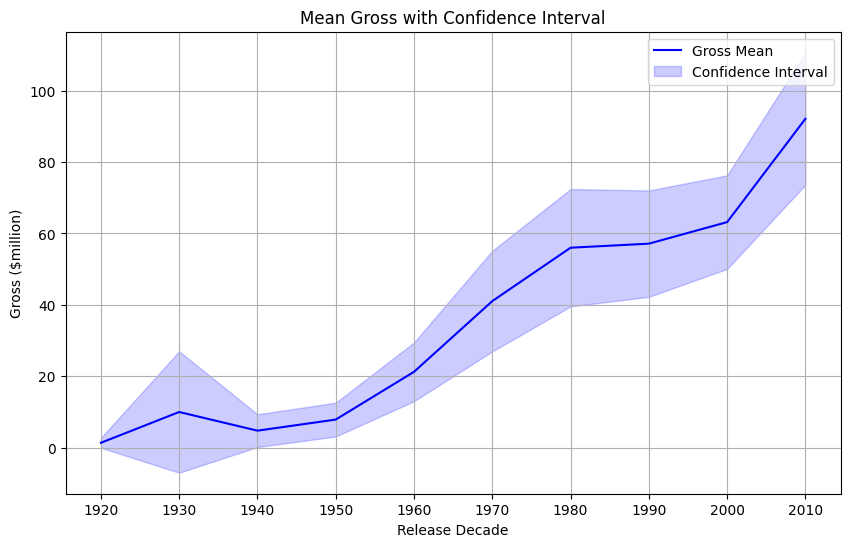

In [76]:
# critical value from t test for confidence interval
alpha = 0.05
gross_by_decade["critical_value"] = st.t.ppf(1 - alpha /2, gross_by_decade["Gross_count"] - 1)

# confidence interval
gross_by_decade["CI_lower"] = gross_by_decade["Gross_mean"] - gross_by_decade["critical_value"] * gross_by_decade["standard_error"]
gross_by_decade["CI_upper"] = gross_by_decade["Gross_mean"] + gross_by_decade["critical_value"] * gross_by_decade["standard_error"]

# dropping the row 2020 as the gross mean is 0.
gross_by_decade = gross_by_decade.drop([2020])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gross_by_decade.index.values, gross_by_decade["Gross_mean"], label='Gross Mean', color='blue')
plt.fill_between(gross_by_decade.index.values, gross_by_decade["CI_lower"], gross_by_decade["CI_upper"], color='blue', alpha=0.2, label='Confidence Interval')
plt.xticks(gross_by_decade.index.values)
plt.xlabel('Release Decade')
plt.ylabel('Gross ($million)')
plt.title('Mean Gross with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


Shape: 151935073.5461736, Location: -8589934592.0, Scale: 8589934591.999999


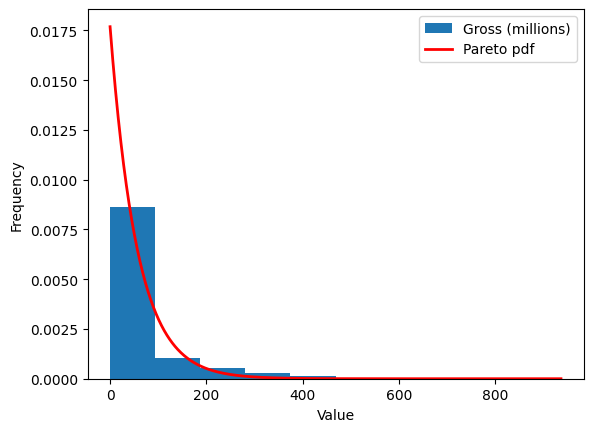

In [77]:
# We see that the Gross variable follows a non-normal distribution
df['Gross (millions)'].plot(kind="hist", density=True)

# For example we choose the Pareto distribution
# Parameters for the Pareto distribution 
shape, loc, scale = st.pareto.fit(df['Gross (millions)'])
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")

x = np.linspace(df['Gross (millions)'].min(), df['Gross (millions)'].max(), 1000 )
pareto_pdf = st.pareto.pdf(x, shape, loc=loc, scale=scale)

# Overlay the Pareto distribution
plt.plot(x, pareto_pdf, 'r-', lw=2, label='Pareto pdf')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Testing the assumption that an Exponential distribution fits the Gross profit column the best via the Fitter library.

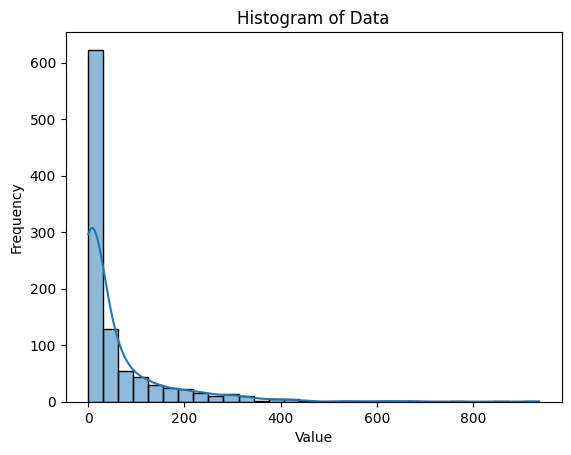

2024-06-08 13:04:17.813 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.001403)
2024-06-08 13:04:17.813 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.002383)
2024-06-08 13:04:17.822 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted logistic distribution with error=0.0022)


Best fit: {'expon': {'loc': 0.0, 'scale': 56.53687797600001}}
Kolmogorov-Smirnov Test Results:
norm: KstestResult(statistic=0.2918770615029936, pvalue=5.833381066306402e-76, statistic_location=0.0, statistic_sign=-1)
expon: KstestResult(statistic=0.3470137035983404, pvalue=4.286086728810591e-108, statistic_location=6.207725, statistic_sign=1)
pareto: KstestResult(statistic=0.30093586670761885, pvalue=8.009544362814638e-81, statistic_location=0.0, statistic_sign=-1)

Anderson-Darling Test Results:
norm: AndersonResult(statistic=130.37901979823346, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=56.53687797600001, scale=103.23817948157672)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
expon: AndersonResult(statistic=inf, critical_values=array([0.921, 1.077, 1.34 , 1.605, 1.956]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_resu

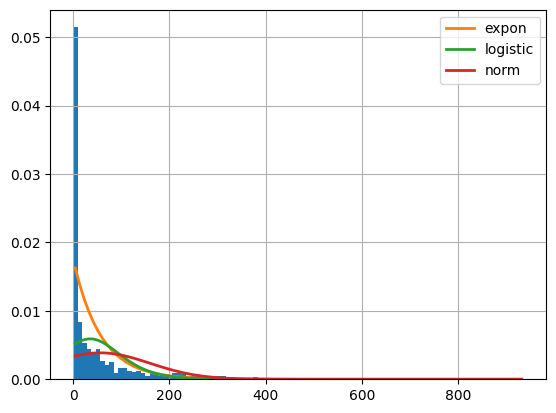

In [78]:
## Code generated from ChatGPT

from fitter import Fitter

# Plot the histogram
sns.histplot(df['Gross (millions)'], bins=30, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

# Fit different distributions
f = Fitter(df['Gross (millions)'], distributions=['norm', 'expon', 'logistic'])
f.fit()

# Print the summary of the fits
f.summary()

# Get the best fit distribution
best_fit = f.get_best()
print(f"Best fit: {best_fit}")

# Perform goodness-of-fit tests
# Kolmogorov-Smirnov Test
ks_results = {
    'norm': st.kstest(df['Gross (millions)'], 'norm', args=(f.fitted_param['norm'])),
    'expon': st.kstest(df['Gross (millions)'], 'expon', args=(f.fitted_param['expon'])),
    'pareto': st.kstest(df['Gross (millions)'], 'logistic', args=(f.fitted_param['logistic']))
}

# Anderson-Darling Test
ad_results = {
    'norm': st.anderson(df['Gross (millions)'], 'norm'),
    'expon': st.anderson(df['Gross (millions)'], 'expon'),
    'logistic': st.anderson(df['Gross (millions)'], 'logistic')
}

print("Kolmogorov-Smirnov Test Results:")
for dist, result in ks_results.items():
    print(f"{dist}: {result}")

print("\nAnderson-Darling Test Results:")
for dist, result in ad_results.items():
    print(f"{dist}: {result}")

## Conclusions
- There is a positive relationship between the decade that a film releases and the IMDB rating. 
- There is a weak correlation between Meta score and IMDB rating. There is also a weak correlation between runtime and IMDB rating. 
- A few of the movies make most of the gross profits.